<a href="https://colab.research.google.com/github/tig1795/predicting_hits_ML_MA/blob/main/data_editing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


# Import dataset

In [ ]:
import pandas as pd

# Example: Import data from csv-file stored on Google Drive

df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/dataset_new_sa_values.csv')

In [ ]:
df.head(5)

,lyrics,genre,num_syllables,pos,year,fog_index,flesch_index,num_lines,sentiment,title,...,number_of_tokens,number_of_types,decades,stemmed_text,POS_tags,POS,values,pred,label,score
0,here she comes mmm just like an angelseems ...,"['alternative rock', 'glam metal', 'hard rock']",405.0,27,1990,4.8,89.75,43,"{'neg': 0.156, 'neu': 0.714, 'pos': 0.131, 'co...",(Can't Live Without Your) Love And Affection,...,323.0,133.0,1990s,here she come mmm just like an angelseem like...,"['_SP', 'RB', 'PRP', 'VBZ', '_SP', 'FW', '_SP'...",missingcan't outside hard mindbut nothing chan...,0.037037,1,POSITIVE,0.988107
1,look into my eyes you will seewhat you mean t...,"['acoustic rock', 'adult contemporary', 'album...",258.3,1,1991,4.4,107.69,36,"{'neg': 0.14100000000000001, 'neu': 0.708, 'po...",(Everything I Do) I Do It For You,...,233.0,95.0,1990s,look into my eye you will seewhat you mean to...,"['VB', 'IN', 'PRP$', 'NNS', '_SP', 'PRP', 'MD'...",worth worth worth other worth worth heart soul...,1.000000,1,POSITIVE,0.998717
2,i can't get no satisfactioni can't get no sati...,"['blues', 'blues rock', 'britannique', 'britis...",296.1,3,1965,4.8,106.67,37,"{'neg': 0.126, 'neu': 0.667, 'pos': 0.20800000...",(I Can't Get No) Satisfaction,...,260.0,83.0,1960s,i ca n't get no satisfactioni ca n't get no s...,"['PRP', 'MD', 'RB', 'VB', 'DT', 'NN', 'MD', 'R...",satisfaction'cause nowhen drivin useless satis...,0.333333,0,NEGATIVE,0.999485
3,oh i i just died in your arms tonightit must...,['classic pop and rock'],372.6,32,1987,4.4,99.23,45,"{'neg': 0.164, 'neu': 0.766, 'pos': 0.07, 'com...",(I Just) Died In Your Arms,...,310.0,130.0,1980s,oh i i just die in your arm tonightit must 'v...,"['UH', '_SP', 'PRP', '_SP', 'PRP', 'RB', 'VBD'...",easy thisher final many long hot easy gonei to...,0.031250,0,NEGATIVE,0.998310
4,your love is fadin' i feel it fadeah your lo...,"['american', 'psychedelic rock', 'psychedelic ...",251.1,55,1970,4.4,99.23,31,"{'neg': 0.148, 'neu': 0.795, 'pos': 0.057, 'co...",(I Know) I'm Losing You,...,203.0,104.0,1970s,your love is fadin ' i feel it fadeah your lo...,"['PRP$', 'NN', 'VBZ', 'VBG', ""''"", '_SP', 'PRP...",cancan eyesa hearted worried love love love wo...,0.018182,0,NEGATIVE,0.997664


In [ ]:
df.shape

(3669, 24)

# Import dataset with emotions

In [ ]:
import pandas as pd

# Example: Import data from csv-file stored on Google Drive

emo = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/emotions_dataset.csv')

In [ ]:
emo.head(5)

,text,emotion_label
0,here she comes mmm just like an angelseems ...,<pad> sadness
1,look into my eyes you will seewhat you mean t...,<pad> joy
2,i can't get no satisfactioni can't get no sati...,<pad> joy
3,oh i i just died in your arms tonightit must...,<pad> sadness
4,your love is fadin' i feel it fadeah your lo...,<pad> sadness


In [ ]:
emo['emotion_label'] = emo['emotion_label'].str.replace('<pad>', '')

In [ ]:
emo.head(5)

,text,emotion_label
0,here she comes mmm just like an angelseems ...,sadness
1,look into my eyes you will seewhat you mean t...,joy
2,i can't get no satisfactioni can't get no sati...,joy
3,oh i i just died in your arms tonightit must...,sadness
4,your love is fadin' i feel it fadeah your lo...,sadness


In [ ]:
emo.shape

(3669, 2)

In [ ]:
from collections import Counter

Counter(emo.emotion_label)

Counter({' sadness': 928,
         ' joy': 1765,
         ' surprise': 33,
         ' anger': 410,
         ' fear': 252,
         ' love': 281})

# Zusammenführen der datasets

In [ ]:
# merge df2 into df1 based on their indexes
result = df.merge(emo, left_index=True, right_index=True)

In [ ]:
result.shape

(3669, 26)

In [ ]:
result.head(5)

,lyrics,genre,num_syllables,pos,year,fog_index,flesch_index,num_lines,sentiment,title,...,decades,stemmed_text,POS_tags,POS,values,pred,label,score,text,emotion_label
0,here she comes mmm just like an angelseems ...,"['alternative rock', 'glam metal', 'hard rock']",405.0,27,1990,4.8,89.75,43,"{'neg': 0.156, 'neu': 0.714, 'pos': 0.131, 'co...",(Can't Live Without Your) Love And Affection,...,1990s,here she come mmm just like an angelseem like...,"['_SP', 'RB', 'PRP', 'VBZ', '_SP', 'FW', '_SP'...",missingcan't outside hard mindbut nothing chan...,0.037037,1,POSITIVE,0.988107,here she comes mmm just like an angelseems ...,sadness
1,look into my eyes you will seewhat you mean t...,"['acoustic rock', 'adult contemporary', 'album...",258.3,1,1991,4.4,107.69,36,"{'neg': 0.14100000000000001, 'neu': 0.708, 'po...",(Everything I Do) I Do It For You,...,1990s,look into my eye you will seewhat you mean to...,"['VB', 'IN', 'PRP$', 'NNS', '_SP', 'PRP', 'MD'...",worth worth worth other worth worth heart soul...,1.000000,1,POSITIVE,0.998717,look into my eyes you will seewhat you mean t...,joy
2,i can't get no satisfactioni can't get no sati...,"['blues', 'blues rock', 'britannique', 'britis...",296.1,3,1965,4.8,106.67,37,"{'neg': 0.126, 'neu': 0.667, 'pos': 0.20800000...",(I Can't Get No) Satisfaction,...,1960s,i ca n't get no satisfactioni ca n't get no s...,"['PRP', 'MD', 'RB', 'VB', 'DT', 'NN', 'MD', 'R...",satisfaction'cause nowhen drivin useless satis...,0.333333,0,NEGATIVE,0.999485,i can't get no satisfactioni can't get no sati...,joy
3,oh i i just died in your arms tonightit must...,['classic pop and rock'],372.6,32,1987,4.4,99.23,45,"{'neg': 0.164, 'neu': 0.766, 'pos': 0.07, 'com...",(I Just) Died In Your Arms,...,1980s,oh i i just die in your arm tonightit must 'v...,"['UH', '_SP', 'PRP', '_SP', 'PRP', 'RB', 'VBD'...",easy thisher final many long hot easy gonei to...,0.031250,0,NEGATIVE,0.998310,oh i i just died in your arms tonightit must...,sadness
4,your love is fadin' i feel it fadeah your lo...,"['american', 'psychedelic rock', 'psychedelic ...",251.1,55,1970,4.4,99.23,31,"{'neg': 0.148, 'neu': 0.795, 'pos': 0.057, 'co...",(I Know) I'm Losing You,...,1970s,your love is fadin ' i feel it fadeah your lo...,"['PRP$', 'NN', 'VBZ', 'VBG', ""''"", '_SP', 'PRP...",cancan eyesa hearted worried love love love wo...,0.018182,0,NEGATIVE,0.997664,your love is fadin' i feel it fadeah your lo...,sadness


In [ ]:
result = result.drop(['text'], axis=1)

In [ ]:
result.to_csv('/content/gdrive/My Drive/Colab Datasets/dataset_with_sa_and_el.csv', index=False)

# Ermittlung der Trennungspunkte für die Hiteinteilung

In [ ]:
import pandas as pd

data = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/dataset_with_sa_and_el.csv')

In [ ]:
data.head(5)

,lyrics,genre,num_syllables,pos,year,fog_index,flesch_index,num_lines,sentiment,title,...,number_of_types,decades,stemmed_text,POS_tags,POS,values,pred,label,score,emotion_label
0,here she comes mmm just like an angelseems ...,"['alternative rock', 'glam metal', 'hard rock']",405.0,27,1990,4.8,89.75,43,"{'neg': 0.156, 'neu': 0.714, 'pos': 0.131, 'co...",(Can't Live Without Your) Love And Affection,...,133.0,1990s,here she come mmm just like an angelseem like...,"['_SP', 'RB', 'PRP', 'VBZ', '_SP', 'FW', '_SP'...",missingcan't outside hard mindbut nothing chan...,0.037037,1,POSITIVE,0.988107,sadness
1,look into my eyes you will seewhat you mean t...,"['acoustic rock', 'adult contemporary', 'album...",258.3,1,1991,4.4,107.69,36,"{'neg': 0.14100000000000001, 'neu': 0.708, 'po...",(Everything I Do) I Do It For You,...,95.0,1990s,look into my eye you will seewhat you mean to...,"['VB', 'IN', 'PRP$', 'NNS', '_SP', 'PRP', 'MD'...",worth worth worth other worth worth heart soul...,1.000000,1,POSITIVE,0.998717,joy
2,i can't get no satisfactioni can't get no sati...,"['blues', 'blues rock', 'britannique', 'britis...",296.1,3,1965,4.8,106.67,37,"{'neg': 0.126, 'neu': 0.667, 'pos': 0.20800000...",(I Can't Get No) Satisfaction,...,83.0,1960s,i ca n't get no satisfactioni ca n't get no s...,"['PRP', 'MD', 'RB', 'VB', 'DT', 'NN', 'MD', 'R...",satisfaction'cause nowhen drivin useless satis...,0.333333,0,NEGATIVE,0.999485,joy
3,oh i i just died in your arms tonightit must...,['classic pop and rock'],372.6,32,1987,4.4,99.23,45,"{'neg': 0.164, 'neu': 0.766, 'pos': 0.07, 'com...",(I Just) Died In Your Arms,...,130.0,1980s,oh i i just die in your arm tonightit must 'v...,"['UH', '_SP', 'PRP', '_SP', 'PRP', 'RB', 'VBD'...",easy thisher final many long hot easy gonei to...,0.031250,0,NEGATIVE,0.998310,sadness
4,your love is fadin' i feel it fadeah your lo...,"['american', 'psychedelic rock', 'psychedelic ...",251.1,55,1970,4.4,99.23,31,"{'neg': 0.148, 'neu': 0.795, 'pos': 0.057, 'co...",(I Know) I'm Losing You,...,104.0,1970s,your love is fadin ' i feel it fadeah your lo...,"['PRP$', 'NN', 'VBZ', 'VBG', ""''"", '_SP', 'PRP...",cancan eyesa hearted worried love love love wo...,0.018182,0,NEGATIVE,0.997664,sadness


In [ ]:
data.shape

(3669, 25)

Dividing points: 0.0135135135135135, 0.0434782608695652


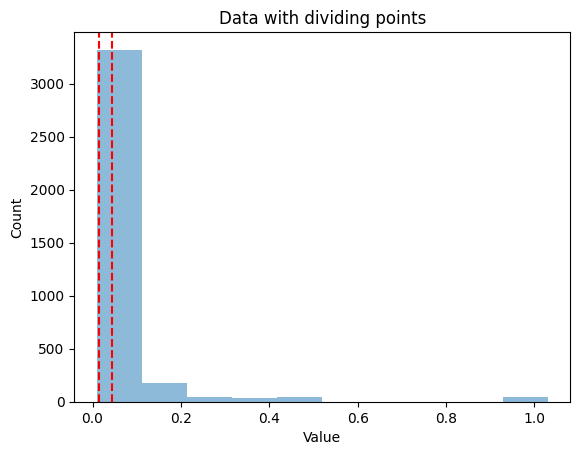

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Wertespalte des Dataframe definieren.
values = data['values']

# Berechnen des Median der Daten.
median = values.median()

# Definieren der Teilungspunkte als das 25. und 75. Perzentil der Daten.
dividing_point1 = values.quantile(0.25)
dividing_point2 = values.quantile(0.75)

# Überprüfen, ob die erste Gruppe leer ist, und gegebenenfalls anpassen der Trennpunkte.
if dividing_point1 >= median:
    dividing_point1 = values.quantile(0.10)
if dividing_point2 <= median:
    dividing_point2 = values.quantile(0.90)

# Erstellen einer booleschen Maske, um die Daten in drei Gruppen aufzuteilen.
group1_mask = values < dividing_point1
group2_mask = (values >= dividing_point1) & (values <= dividing_point2)
group3_mask = values > dividing_point2

# Verwenden der booleschen Maske, um die Daten in drei Gruppen aufzuteilen.
group1 = values[group1_mask]
group2 = values[group2_mask]
group3 = values[group3_mask]

# Ausgabe der Trennungspunkte.
print("Dividing points: {}, {}".format(dividing_point1, dividing_point2))

# Ausgabe des Histogramm der Daten mit den Teilungspunkten.
plt.hist(values, bins=10, alpha=0.5)
plt.axvline(x=dividing_point1, color='red', linestyle='--')
plt.axvline(x=dividing_point2, color='red', linestyle='--')
plt.title("Data with dividing points")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

# Ausgabe der Gruppen
#print("Group 1:", group1.values)
#print("Group 2:", group2.values)
#print("Group 3:", group3.values)

# Hiteinteilung

In [ ]:
len(group1)

891

In [ ]:
len(group2)

1866

In [ ]:
len(group3)

912

In [ ]:
data['Hit'] = '0'
data.head(2)

,lyrics,genre,num_syllables,pos,year,fog_index,flesch_index,num_lines,sentiment,title,...,decades,stemmed_text,POS_tags,POS,values,pred,label,score,emotion_label,Hit
0,here she comes mmm just like an angelseems ...,"['alternative rock', 'glam metal', 'hard rock']",405.0,27,1990,4.8,89.75,43,"{'neg': 0.156, 'neu': 0.714, 'pos': 0.131, 'co...",(Can't Live Without Your) Love And Affection,...,1990s,here she come mmm just like an angelseem like...,"['_SP', 'RB', 'PRP', 'VBZ', '_SP', 'FW', '_SP'...",missingcan't outside hard mindbut nothing chan...,0.037037,1,POSITIVE,0.988107,sadness,0
1,look into my eyes you will seewhat you mean t...,"['acoustic rock', 'adult contemporary', 'album...",258.3,1,1991,4.4,107.69,36,"{'neg': 0.14100000000000001, 'neu': 0.708, 'po...",(Everything I Do) I Do It For You,...,1990s,look into my eye you will seewhat you mean to...,"['VB', 'IN', 'PRP$', 'NNS', '_SP', 'PRP', 'MD'...",worth worth worth other worth worth heart soul...,1.000000,1,POSITIVE,0.998717,joy,0


In [ ]:
data.shape

(3669, 26)

In [ ]:
s = data.copy()
for i, row in s.iterrows():
    value = row['values'] # replace 'Your_Column_Name' with the name of the column you want to compare
    if value < 0.0135135135135135:
        s.at[i, 'Hit'] = 'No'
    elif value <= 0.0434782608695652:
        s.at[i, 'Hit'] = 'None'
    else:
        s.at[i, 'Hit'] = 'Yes'

In [ ]:
s.shape

(3669, 26)

In [ ]:
s.head(5)

,lyrics,genre,num_syllables,pos,year,fog_index,flesch_index,num_lines,sentiment,title,...,decades,stemmed_text,POS_tags,POS,values,pred,label,score,emotion_label,Hit
0,here she comes mmm just like an angelseems ...,"['alternative rock', 'glam metal', 'hard rock']",405.0,27,1990,4.8,89.75,43,"{'neg': 0.156, 'neu': 0.714, 'pos': 0.131, 'co...",(Can't Live Without Your) Love And Affection,...,1990s,here she come mmm just like an angelseem like...,"['_SP', 'RB', 'PRP', 'VBZ', '_SP', 'FW', '_SP'...",missingcan't outside hard mindbut nothing chan...,0.037037,1,POSITIVE,0.988107,sadness,None
1,look into my eyes you will seewhat you mean t...,"['acoustic rock', 'adult contemporary', 'album...",258.3,1,1991,4.4,107.69,36,"{'neg': 0.14100000000000001, 'neu': 0.708, 'po...",(Everything I Do) I Do It For You,...,1990s,look into my eye you will seewhat you mean to...,"['VB', 'IN', 'PRP$', 'NNS', '_SP', 'PRP', 'MD'...",worth worth worth other worth worth heart soul...,1.000000,1,POSITIVE,0.998717,joy,Yes
2,i can't get no satisfactioni can't get no sati...,"['blues', 'blues rock', 'britannique', 'britis...",296.1,3,1965,4.8,106.67,37,"{'neg': 0.126, 'neu': 0.667, 'pos': 0.20800000...",(I Can't Get No) Satisfaction,...,1960s,i ca n't get no satisfactioni ca n't get no s...,"['PRP', 'MD', 'RB', 'VB', 'DT', 'NN', 'MD', 'R...",satisfaction'cause nowhen drivin useless satis...,0.333333,0,NEGATIVE,0.999485,joy,Yes
3,oh i i just died in your arms tonightit must...,['classic pop and rock'],372.6,32,1987,4.4,99.23,45,"{'neg': 0.164, 'neu': 0.766, 'pos': 0.07, 'com...",(I Just) Died In Your Arms,...,1980s,oh i i just die in your arm tonightit must 'v...,"['UH', '_SP', 'PRP', '_SP', 'PRP', 'RB', 'VBD'...",easy thisher final many long hot easy gonei to...,0.031250,0,NEGATIVE,0.998310,sadness,None
4,your love is fadin' i feel it fadeah your lo...,"['american', 'psychedelic rock', 'psychedelic ...",251.1,55,1970,4.4,99.23,31,"{'neg': 0.148, 'neu': 0.795, 'pos': 0.057, 'co...",(I Know) I'm Losing You,...,1970s,your love is fadin ' i feel it fadeah your lo...,"['PRP$', 'NN', 'VBZ', 'VBG', ""''"", '_SP', 'PRP...",cancan eyesa hearted worried love love love wo...,0.018182,0,NEGATIVE,0.997664,sadness,None


In [ ]:
from collections import Counter

Counter(s.Hit)

Counter({'None': 1866, 'Yes': 912, 'No': 891})

In [ ]:
s.to_csv('/content/gdrive/My Drive/Colab Datasets/dataset_complete.csv', index=False)

# Erstellung von CSV-files nur mit Hits/no Hits

In [ ]:
import pandas as pd

df28 = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/dataset_complete.csv')

In [ ]:
df28.head(5)

,lyrics,genre,num_syllables,pos,year,fog_index,flesch_index,num_lines,sentiment,title,...,decades,stemmed_text,POS_tags,POS,values,pred,label,score,emotion_label,Hit
0,here she comes mmm just like an angelseems ...,"['alternative rock', 'glam metal', 'hard rock']",405.0,27,1990,4.8,89.75,43,"{'neg': 0.156, 'neu': 0.714, 'pos': 0.131, 'co...",(Can't Live Without Your) Love And Affection,...,1990s,here she come mmm just like an angelseem like...,"['_SP', 'RB', 'PRP', 'VBZ', '_SP', 'FW', '_SP'...",missingcan't outside hard mindbut nothing chan...,0.037037,1,POSITIVE,0.988107,sadness,None
1,look into my eyes you will seewhat you mean t...,"['acoustic rock', 'adult contemporary', 'album...",258.3,1,1991,4.4,107.69,36,"{'neg': 0.14100000000000001, 'neu': 0.708, 'po...",(Everything I Do) I Do It For You,...,1990s,look into my eye you will seewhat you mean to...,"['VB', 'IN', 'PRP$', 'NNS', '_SP', 'PRP', 'MD'...",worth worth worth other worth worth heart soul...,1.000000,1,POSITIVE,0.998717,joy,Yes
2,i can't get no satisfactioni can't get no sati...,"['blues', 'blues rock', 'britannique', 'britis...",296.1,3,1965,4.8,106.67,37,"{'neg': 0.126, 'neu': 0.667, 'pos': 0.20800000...",(I Can't Get No) Satisfaction,...,1960s,i ca n't get no satisfactioni ca n't get no s...,"['PRP', 'MD', 'RB', 'VB', 'DT', 'NN', 'MD', 'R...",satisfaction'cause nowhen drivin useless satis...,0.333333,0,NEGATIVE,0.999485,joy,Yes
3,oh i i just died in your arms tonightit must...,['classic pop and rock'],372.6,32,1987,4.4,99.23,45,"{'neg': 0.164, 'neu': 0.766, 'pos': 0.07, 'com...",(I Just) Died In Your Arms,...,1980s,oh i i just die in your arm tonightit must 'v...,"['UH', '_SP', 'PRP', '_SP', 'PRP', 'RB', 'VBD'...",easy thisher final many long hot easy gonei to...,0.031250,0,NEGATIVE,0.998310,sadness,None
4,your love is fadin' i feel it fadeah your lo...,"['american', 'psychedelic rock', 'psychedelic ...",251.1,55,1970,4.4,99.23,31,"{'neg': 0.148, 'neu': 0.795, 'pos': 0.057, 'co...",(I Know) I'm Losing You,...,1970s,your love is fadin ' i feel it fadeah your lo...,"['PRP$', 'NN', 'VBZ', 'VBG', ""''"", '_SP', 'PRP...",cancan eyesa hearted worried love love love wo...,0.018182,0,NEGATIVE,0.997664,sadness,None


In [ ]:
df28.shape

(3669, 26)

## hits

In [ ]:
hit = df28[df28['Hit'] == 'Yes']

In [ ]:
hit.shape

(912, 26)

In [ ]:
hit.head(5)

,lyrics,genre,num_syllables,pos,year,fog_index,flesch_index,num_lines,sentiment,title,...,decades,stemmed_text,POS_tags,POS,values,pred,label,score,emotion_label,Hit
1,look into my eyes you will seewhat you mean t...,"['acoustic rock', 'adult contemporary', 'album...",258.3,1,1991,4.4,107.69,36,"{'neg': 0.14100000000000001, 'neu': 0.708, 'po...",(Everything I Do) I Do It For You,...,1990s,look into my eye you will seewhat you mean to...,"['VB', 'IN', 'PRP$', 'NNS', '_SP', 'PRP', 'MD'...",worth worth worth other worth worth heart soul...,1.000000,1,POSITIVE,0.998717,joy,Yes
2,i can't get no satisfactioni can't get no sati...,"['blues', 'blues rock', 'britannique', 'britis...",296.1,3,1965,4.8,106.67,37,"{'neg': 0.126, 'neu': 0.667, 'pos': 0.20800000...",(I Can't Get No) Satisfaction,...,1960s,i ca n't get no satisfactioni ca n't get no s...,"['PRP', 'MD', 'RB', 'VB', 'DT', 'NN', 'MD', 'R...",satisfaction'cause nowhen drivin useless satis...,0.333333,0,NEGATIVE,0.999485,joy,Yes
7,our life together is so precious togetherwe ha...,"['britannique', 'british', 'classic pop and ro...",288.0,4,1981,4.8,81.29,28,"{'neg': 0.068, 'neu': 0.625, 'pos': 0.308, 'co...",(Just Like) Starting Over,...,1980s,our life togeth is so preciou togetherw have ...,"['PRP$', 'NN', 'RB', 'VBZ', 'RB', 'JJ', 'NN', ...",precious speciallet long lovewhy nice alone ea...,0.250000,1,POSITIVE,0.998593,joy,Yes
9,love is higher than a mountain love is thicker...,"['classic pop and rock', 'death by myocarditis']",224.1,8,1978,4.0,91.78,30,"{'neg': 0.062, 'neu': 0.7000000000000001, 'pos...",(Love Is) Thicker Than Water,...,1970s,love is higher than a mountain love is thicke...,"['NN', 'VBZ', 'JJR', 'IN', 'DT', 'NN', 'NN', '...",dreamheaven silent crazy dreamheaven dreamheav...,0.125000,1,POSITIVE,0.998285,sadness,Yes
15,sittin' in the morning suni'll be sittin' when...,"['american', 'blues', 'death by airplane', 'de...",223.2,4,1968,4.8,98.21,25,"{'neg': 0.018000000000000002, 'neu': 0.927, 'p...",(Sittin' On) The Dock Of The Bay,...,1960s,sittin ' in the morn suni 'll be sittin ' whe...,"['NNP', ""''"", 'IN', 'DT', 'NN', 'NN', 'VB', 'N...",same listentwo morning suni'll sittin evening ...,0.250000,0,NEGATIVE,0.994735,joy,Yes


In [ ]:
hit.to_csv('/content/gdrive/My Drive/Colab Datasets/hits.csv', index=False)

## no hits

In [ ]:
nohits = df28[df28['Hit'] == 'No']

In [ ]:
nohits.shape

(891, 26)

In [ ]:
nohits.head(5)

,lyrics,genre,num_syllables,pos,year,fog_index,flesch_index,num_lines,sentiment,title,...,decades,stemmed_text,POS_tags,POS,values,pred,label,score,emotion_label,Hit
6,it ain't the clothes that you wearit ain't the...,pop,448.2,86,1990,4.4,107.69,62,"{'neg': 0.031, 'neu': 0.728, 'pos': 0.241, 'co...",(It's Just) The Way That You Love Me,...,1990s,it ai n't the cloth that you wearit ai n't th...,"['PRP', 'VBP', 'RB', 'DT', 'NNS', 'WDT', 'PRP'...",black impressed fameit heavy hollywood gameain...,0.011628,1,POSITIVE,0.998747,surprise,No
11,woohpretty woman walking down the streetprett...,"['aor', 'classic pop and rock', 'glam metal', ...",198.0,88,1982,4.4,99.23,25,"{'neg': 0.067, 'neu': 0.528, 'pos': 0.406, 'co...",(Oh) Pretty Woman,...,1980s,woohpretti woman walk down the streetpretti w...,"['NNP', 'NNP', '_SP', 'VBG', 'IN', 'DT', 'JJ',...",streetpretty meetpretty good youmercypretty me...,0.011364,1,POSITIVE,0.998274,joy,No
14,hey man i don't feel like goin' to school no...,"['american', 'classic pop and rock', 'neo rock...",423.0,84,1983,6.0,95.17,33,"{'neg': 0.109, 'neu': 0.805, 'pos': 0.08600000...",(She's) Sexy + 17,...,1980s,hey man i do n't feel like goin ' to school n...,"['NNP', '_SP', 'NN', '_SP', 'PRP', 'VBP', 'RB'...",moreme oh mewell much early little little only...,0.011905,1,POSITIVE,0.994257,joy,No
19,kick it!you wake up late for school man you ...,"['alternative hip-hop', 'american', 'américain...",181.8,98,1987,4.8,98.21,22,"{'neg': 0.17500000000000002, 'neu': 0.664, 'po...",(You Gotta) Fight For Your Right,...,1980s,kick it ! you wake up late for school man you...,"['VB', 'PRP', 'VBP', 'RP', 'RB', 'IN', 'NN', '...",kinda jealous beastie school man goyou mom hom...,0.010204,0,NEGATIVE,0.996504,anger,No
28,i saw star wars at least 8 timeshad the pac-ma...,country,349.2,84,2003,4.4,99.23,47,"{'neg': 0.076, 'neu': 0.885, 'pos': 0.039, 'co...",19 Somethin',...,2000s,i saw star war at least 8 timeshad the pac-ma...,"['PRP', 'VBD', 'NN', 'NNS', 'RB', 'JJS', 'CD',...",pac full evil kinevil right new first old afte...,0.011905,1,POSITIVE,0.995778,sadness,No


In [ ]:
nohits.to_csv('/content/gdrive/My Drive/Colab Datasets/no_hits.csv', index=False)